In [1]:
import glob
import os
from matplotlib import pyplot as plt
from pylab import cm
from skimage.io import imread
from skimage import morphology, measure
import numpy as np
import cv2

In [2]:
directory_names = list(set(glob.glob(os.path.join('databowl', 'stage1_train', '*', 'images'))\
                          ).difference(set(glob.glob(os.path.join('databowl', 'stage1_train', '*.*', 'images')))))

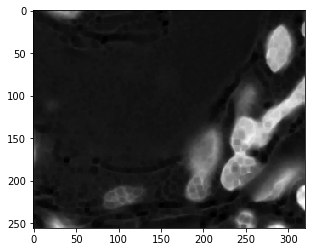

(256, 320)


In [29]:
ex = glob.glob(os.path.join(directory_names[0], "*.png"))[0]
im = imread(ex, as_grey = True)
imdilated = morphology.dilation(im, np.ones((4,4)))
plt.imshow(imdilated,cmap = cm.gray_r)
plt.show()
print(np.shape(im))

In [30]:
f = plt.figure(figsize = (12,3))
imthr = im.copy
imthr = np.where(im > np.mean(im), 0., 1.0)

sub1 = plt.subplot(1, 3, 1)
plt.imshow(imdilated, cmap = cm.gray_r)
sub1.set_title("Original")

sub2 = plt.subplot(1,3,2)
plt.imshow(imthr, cmap = cm.gray_r)
sub2.set_title("Threshold Image")

imdilated = morphology.dilation(imthr, np.ones((4,4)))
sub3 = plt.subplot(1,3,3)
plt.imshow(imdilated, cmap = cm.gray_r)
sub3.set_title("Dilated Image")


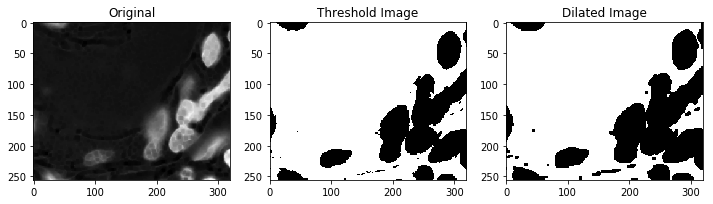

In [31]:
plt.show()

In [6]:
numberofImages = 0

for folder in directory_names:
    for fileNameDir in os.walk(folder):
        for fileName in fileNameDir[2]:
            if fileName[-4:] != '.png':
                continue
            numberofImages += 1

In [48]:
maxPixel = 128 # reduce pixel dim by half
imageSize = maxPixel ** 2
num_rows = numberofImages
num_features = imageSize

In [49]:
#create matrix with zeros, to be filled in with for loop below
X = np.zeros((num_rows, num_features), dtype = float)
y = np.zeros((num_rows))

In [50]:
files = []
i = 0
label = 0
namesClasses = list()

In [51]:
#loops through images, resizes them -> 128x128 -> 1x16384 and appends them to X[]
for folder in directory_names:
    for fileNameDir in os.walk(folder):
        for fileName in fileNameDir[2]:
            if fileName[-4:] != ".png":
                continue
            
            ImageLoc = "{0}{1}{2}".format(fileNameDir[0], os.sep, fileName)
            image = imread(ImageLoc, as_grey = True)
            files.append(ImageLoc)
            
            image = cv2.resize(image, (maxPixel, maxPixel))
            
            X[i, 0:imageSize] = np.reshape(image, (1, imageSize))
            
            i += 1
            report = [int((j+1)*num_rows/20.) for j in range(20)]
            if i in report: print(np.ceil(i*100.0 / num_rows), '% done')
            
            

5.0 % done
10.0 % done
15.0 % done
20.0 % done
25.0 % done
30.0 % done
35.0 % done
40.0 % done
45.0 % done
50.0 % done
55.0 % done
60.0 % done
65.0 % done
70.0 % done
75.0 % done
80.0 % done
85.0 % done
90.0 % done
95.0 % done
100.0 % done


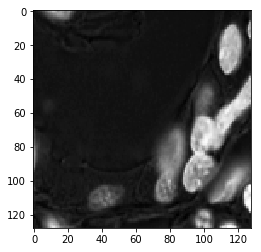

In [52]:
plt.imshow(np.reshape(X[0], (128, 128)),cmap = cm.gray_r)
plt.show()

In [53]:
print("black background avg pixel:", np.mean(X[10]))
print("white background avg pixel:", np.mean(X[0]))

black background avg pixel: 0.0688338335823
white background avg pixel: 0.597601543971


In [57]:
X[0]

array([ 0.65456667,  0.65216985,  0.63337765, ...,  0.65265838,
        0.64799225,  0.64686819])